<a href="https://colab.research.google.com/github/tsekine2/Shogi-Title-Prediction/blob/master/%E5%B0%86%E6%A3%8B%E3%82%BF%E3%82%A4%E3%83%88%E3%83%AB%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''ライブラリインポート'''
import numpy as np
import pandas as pd
% matplotlib inline
import matplotlib.pyplot as plt
!pip install japanize-matplotlib
import japanize_matplotlib
import seaborn as sns
sns.set(font='IPAexGothic')
import lightgbm as lgb
from lightgbm import LGBMRegressor

     |████████████████████████████████| 4.1MB 4.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=e353c16fde1eb32f576c56b7d2912f8ccdec41b941d9f58cc0941384fa78e91e
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
'''学習データ'''
train_path = "/content/drive/My Drive/Colab Notebooks/成果物/将棋タイトル/棋士解析(2017_2019) - train.tsv"
train = pd.read_csv(train_path, delimiter='\t')
train.head(len(train))

,name,age,debut age,juni-sen,ryuo-sen,oui-league,osho-league,wins,games,champions,get_titles,titles
0,豊島将之,29,16,15,15,3,3,118,175,1,4,7
1,渡辺明,35,15,14,15,1,3,102,154,2,6,7
2,永瀬拓矢,27,17,9,13,1,0,117,153,0,2,3
3,木村一基,46,23,13,13,3,0,65,117,0,1,1
4,羽生善治,49,15,15,15,3,1,90,155,1,2,6
5,谷川浩司,57,14,12,7,2,0,63,122,0,0,0
6,佐藤康光,50,17,15,14,0,0,50,101,0,0,0
7,森内俊之,49,16,0,12,0,0,21,58,0,0,0
8,丸山忠久,49,19,10,15,1,0,68,120,0,0,0
9,郷田真隆,49,19,12,14,0,2,63,122,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64a9c64240>,
      dtype=object)

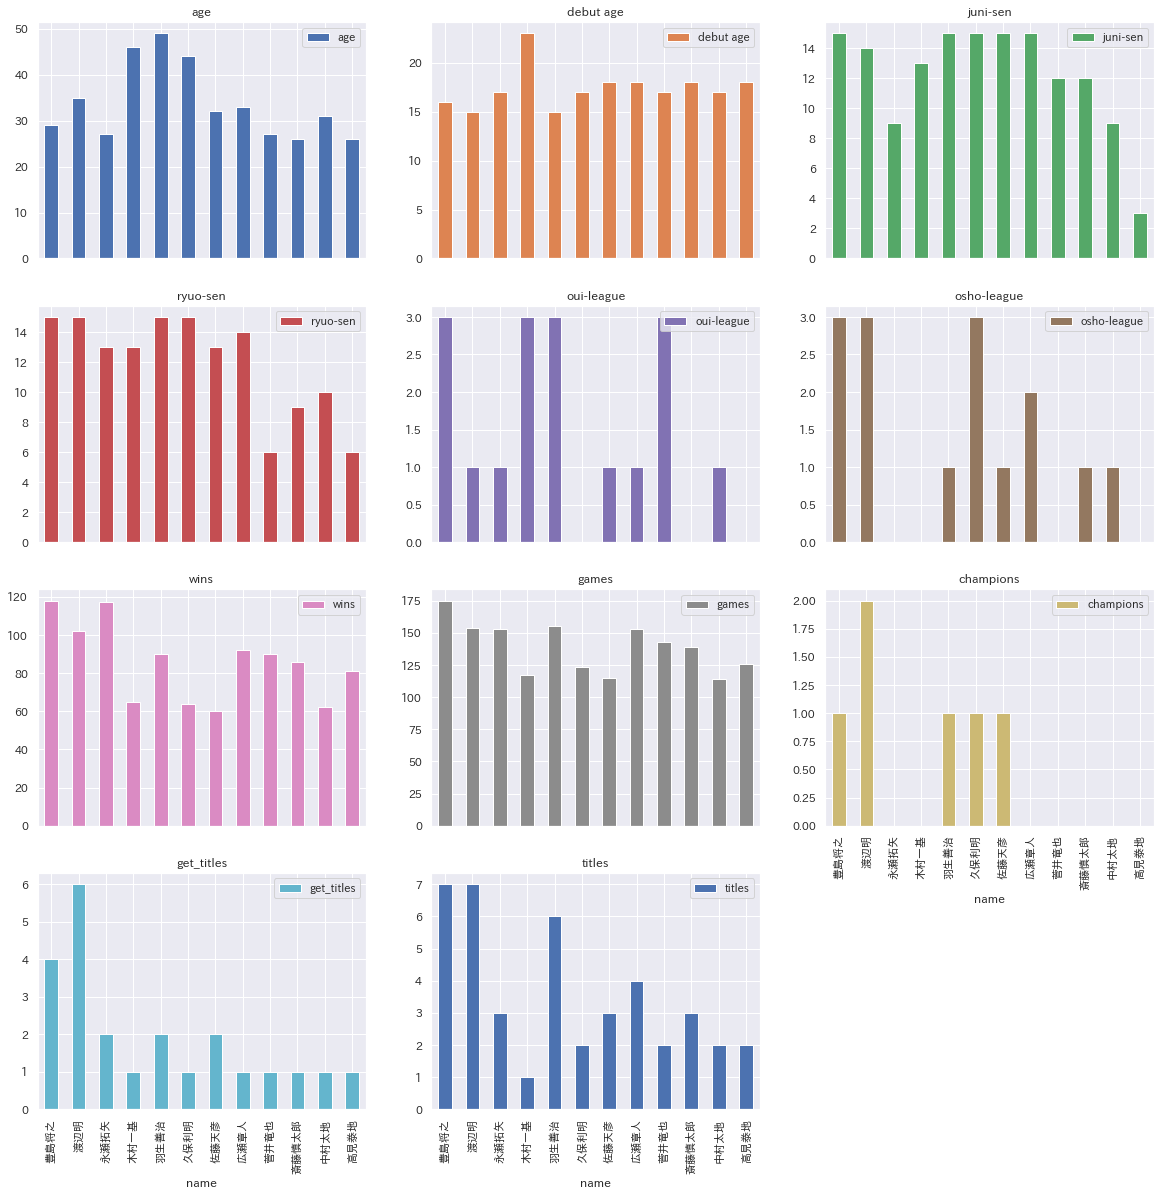

In [3]:
'''データ可視化'''
train[train['get_titles'] > 0].plot.bar(x='name', figsize=(20,20), sharex=True, subplots=True, layout=(4,3))

In [4]:
''' テストデータ'''
test_path = "/content/drive/My Drive/Colab Notebooks/成果物/将棋タイトル/棋士解析(2017_2019) - test.tsv"
test = pd.read_csv(test_path, delimiter='\t')
test.head(len(test))

,name,age,debut age,juni-sen,ryuo-sen,oui-league,osho-league,wins,games,champions
0,藤井聡太,17,14,5,3,0,1,158,190,3
1,佐々木勇気,25,16,6,9,1,0,73,115,0
2,増田康宏,22,16,5,6,0,0,107,158,1
3,青嶋未来,25,20,6,3,0,0,70,120,0
4,佐々木大地,24,20,3,0,2,0,127,182,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64a9669eb8>,
      dtype=object)

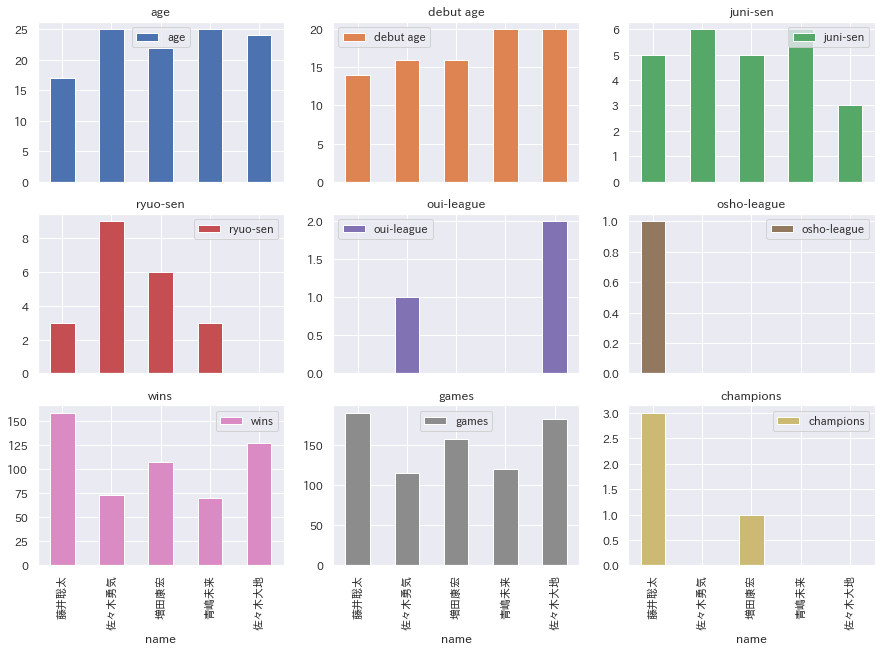

In [5]:
'''データ可視化'''
test.plot.bar(x='name', figsize=(15,10), sharex=True, subplots=True, layout=(3,3))

In [0]:
'''学習に用いる変数とターゲット変数を抽出'''
train_x = train.loc[:, 'age' : 'champions']
train_y = train['get_titles']
test_x = test.loc[:, "age" : "champions"]

In [0]:
'''学習＆予測'''
params = {
    'learning_rate' : 0.01,
    'min_child_samples' : 0,
}
model = LGBMRegressor(**params)
model.fit(train_x, train_y)
y_pred = model.predict(test_x)

In [8]:
'''結果表示'''
names = test["name"]
display(pd.DataFrame(y_pred, index=names, columns=['タイトル獲得数']))

,タイトル獲得数
name,
藤井聡太,4.104475
佐々木勇気,0.934637
増田康宏,2.836540
青嶋未来,0.934637
佐々木大地,1.568605


In [9]:
'''重要度表示'''
features = test.loc[:, 'age' : 'champions']
display(pd.DataFrame(model.feature_importances_, index=features.columns, columns=['importance']).sort_values('importance', ascending=False))

,importance
age,329
wins,246
debut age,207
games,200
juni-sen,104
ryuo-sen,100
champions,100
osho-league,30
oui-league,1


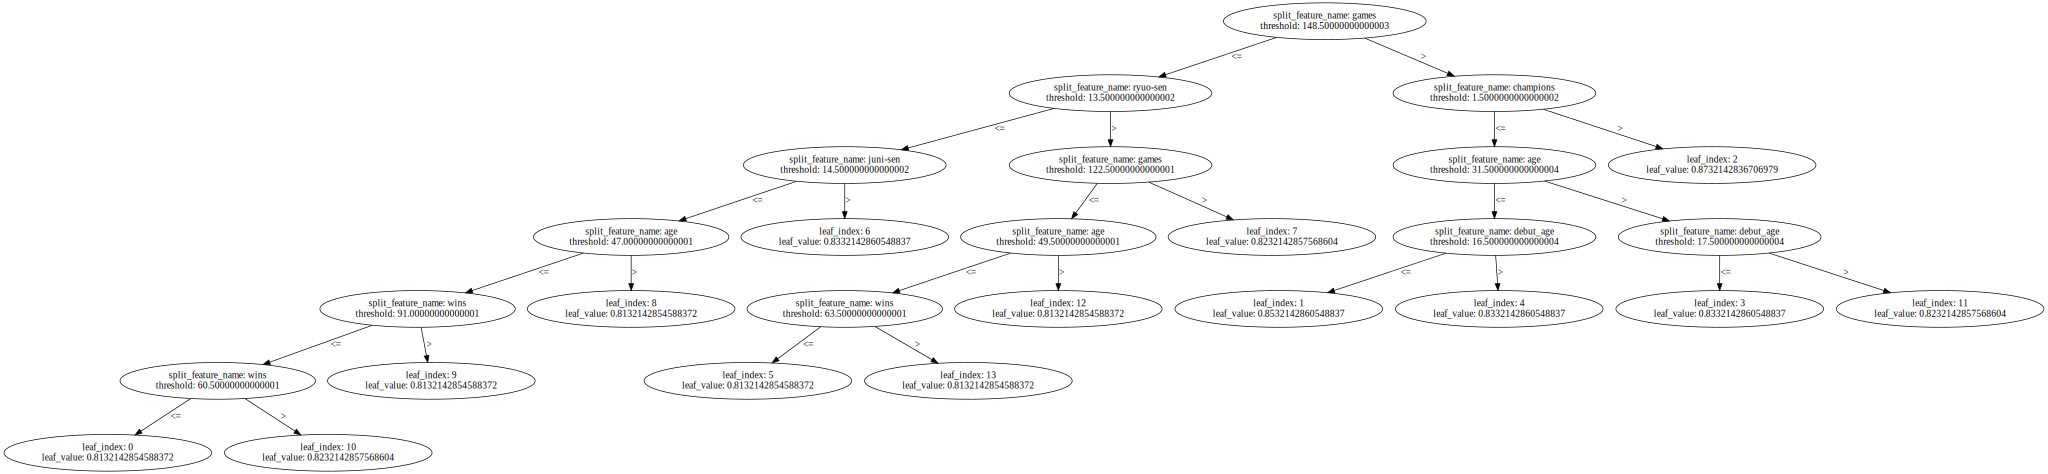

In [10]:
lgb.create_tree_digraph(model)

In [0]:
train_y2 = train['titles']
model.fit(train_x, train_y2)
y_pred2 = model.predict(test_x)

In [12]:
'''結果表示'''
display(pd.DataFrame(y_pred2, index=names, columns=['タイトル登場数']))

,タイトル登場数
name,
藤井聡太,4.999895
佐々木勇気,1.830056
増田康宏,4.999895
青嶋未来,1.830056
佐々木大地,2.464024


In [13]:
'''重要度表示'''
display(pd.DataFrame(model.feature_importances_, index=features.columns, columns=['importance']).sort_values('importance', ascending=False))

,importance
debut age,420
age,285
games,204
wins,181
juni-sen,113
ryuo-sen,102
osho-league,8
oui-league,2
champions,0


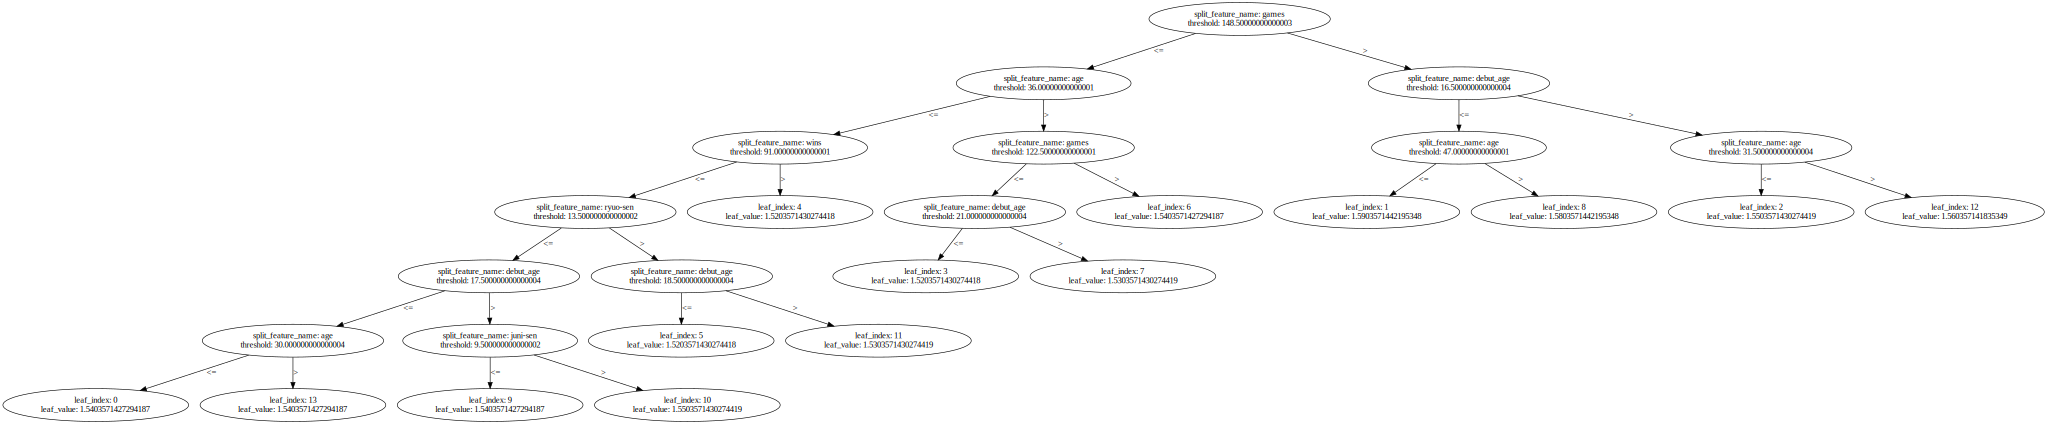

In [14]:
lgb.create_tree_digraph(model)

In [0]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(train_x, train_y)
lr_pred = reg.predict(test_x)

In [16]:
'''結果表示'''
display(pd.DataFrame(lr_pred, index=names, columns=['タイトル獲得数']))

,タイトル獲得数
name,
藤井聡太,4.389278
佐々木勇気,0.888305
増田康宏,1.353502
青嶋未来,-0.755197
佐々木大地,0.736462


In [17]:
display(pd.DataFrame(reg.coef_, index=features.columns, columns=['coef']))
print('intercept = {}'.format(reg.intercept_))

,coef
age,-0.007417
debut age,-0.121117
juni-sen,-0.037535
ryuo-sen,0.098913
oui-league,0.260973
osho-league,0.419284
wins,0.052264
games,-0.029559
champions,0.457157


intercept = 1.6695610021442517


In [18]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor()
nn.fit(train_x, train_y)
nn_pred = nn.predict(test_x)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
'''結果表示'''
display(pd.DataFrame(nn_pred, index=names, columns=['タイトル獲得数']))

,タイトル獲得数
name,
藤井聡太,4.414906
佐々木勇気,0.506935
増田康宏,0.674503
青嶋未来,0.668381
佐々木大地,-0.058010
